### Cho dữ liệu Social_Network_Ads.csv
### Sử dụng thuật toán KNN để dự đoán khách hàng mua (1) hay không mua sản phẩm (0) dựa trên các thông tin được cung cấp:
1. Đọc dữ liệu và gán cho biến data. Tiền xử lý dữ liệu (nếu cần)
2. Tạo inputs data với các cột trừ cột Purchased, và outputs data với 1 cột là Purchased
3. Từ inputs data và outputs data => Tạo X_train, X_test, y_train, y_test với tỷ lệ 70-30
4. Thực hiện KNN với X_train, y_train
5. Dự đoán y từ X_test => so sánh với y_test
6. Đánh giá mô hình => Nhận xét
7. Ghi mô hình (nếu mô hình tốt sau khi đánh giá)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# import some data to play with
data = pd.read_csv("../../Data/Social_Network_Ads.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            400 non-null    int64 
 1   Gender             400 non-null    object
 2   Age                400 non-null    int64 
 3   EstimatedSalary    400 non-null    int64 
 4   EstimatedSalary_K  400 non-null    int64 
 5   Purchased          400 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.9+ KB


In [3]:
data.shape

(400, 6)

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,EstimatedSalary_K,Purchased
0,15624510,Male,19,19000,19,0
1,15810944,Male,35,20000,20,0
2,15668575,Female,26,43000,43,0
3,15603246,Female,27,57000,57,0
4,15804002,Male,19,76000,76,0


In [5]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,EstimatedSalary_K,Purchased
395,15691863,Female,46,41000,41,1
396,15706071,Male,51,23000,23,1
397,15654296,Female,50,20000,20,1
398,15755018,Male,36,33000,33,0
399,15594041,Female,49,36000,36,1


In [6]:
# thống kê số lượng các lớp
data.groupby('Purchased').count()["Gender"]

Purchased
0    257
1    143
Name: Gender, dtype: int64

In [7]:
le = LabelEncoder()
data['Gender_E'] = le.fit_transform(data.Gender)

In [8]:
data.head()

,User ID,Gender,Age,EstimatedSalary,EstimatedSalary_K,Purchased,Gender_E
0,15624510,Male,19,19000,19,0,1
1,15810944,Male,35,20000,20,0,1
2,15668575,Female,26,43000,43,0,0
3,15603246,Female,27,57000,57,0,0
4,15804002,Male,19,76000,76,0,1


In [9]:
# The columns that we will be making predictions with.
inputs = data.iloc[:,[2,3,5]]
inputs.shape

(400, 3)

In [10]:
inputs.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [11]:
# The column that we want to predict.
outputs = data['Purchased']
#outputs = np.array(outputs)
outputs.shape

(400,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.20, random_state=1)

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
list_k = []
list_acc = []
for K_value in range(2,int((y_train.shape[0]**0.5)/2)):
#for K_value in range(2,10):
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors = K_value)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    acc = accuracy_score(y_test,y_pred)*100
    list_acc.append(acc)
    print("k = ", K_value,": Accuracy is ", accuracy_score(y_test,y_pred))

k =  2 : Accuracy is  1.0
k =  3 : Accuracy is  1.0
k =  4 : Accuracy is  1.0
k =  5 : Accuracy is  1.0
k =  6 : Accuracy is  1.0
k =  7 : Accuracy is  1.0


In [15]:
vi_tri = list_acc.index(max(list_acc))
k = list_k[vi_tri]
print("The optimal number of neighbors is", k,"with", list_acc[vi_tri])

The optimal number of neighbors is 2 with 100.0


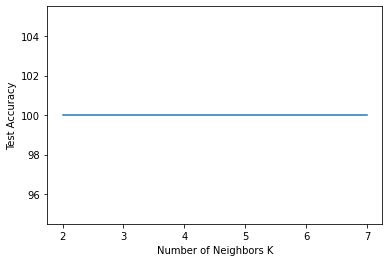

In [16]:
plt.plot(list_k, list_acc)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [17]:
for i in (4,6):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("k=", i, ": The Train prediction accuracy is: ",
    knn.score(X_train,y_train)*100,"%")
    print("------ The Test prediction accuracy is: ",
    knn.score(X_test,y_test)*100,"%")

k= 4 : The Train prediction accuracy is:  100.0 %
------ The Test prediction accuracy is:  100.0 %
k= 6 : The Train prediction accuracy is:  100.0 %
------ The Test prediction accuracy is:  100.0 %


In [18]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [19]:
# Kiểm tra độ chính xác
print("The Train prediction accuracy is: ",
knn.score(X_train,y_train)*100,"%")
print("The Test prediction accuracy is: ",
knn.score(X_test,y_test)*100,"%")

The Train prediction accuracy is:  100.0 %
The Test prediction accuracy is:  100.0 %


In [20]:
y_pred = knn.predict(X_test)
# y_pred

In [21]:
confusion_matrix(y_test, y_pred)

array([[48,  0],
       [ 0, 32]], dtype=int64)

In [22]:
confusion_matrix(y_test, y_pred)

array([[48,  0],
       [ 0, 32]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        32

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



### Quan sát kết quả và đánh giá:
* Có sự chênh lệch giữa train r_score và test r_score ~7% => có thể tạm chấp nhận
* Mô hình có độ chính xác khá cao: 87.5%

### Feature Selection

In [24]:
#get correlations of each features in dataset
data_sub = data.iloc[:,[2,3,5,4]]
corrmat = data_sub.corr()
top_corr_features = corrmat.index

In [25]:
data_sub.corr()

,Age,EstimatedSalary,Purchased,EstimatedSalary_K
Age,1.000000,0.155238,0.622454,0.155238
EstimatedSalary,0.155238,1.000000,0.362083,1.000000
Purchased,0.622454,0.362083,1.000000,0.362083
EstimatedSalary_K,0.155238,1.000000,0.362083,1.000000


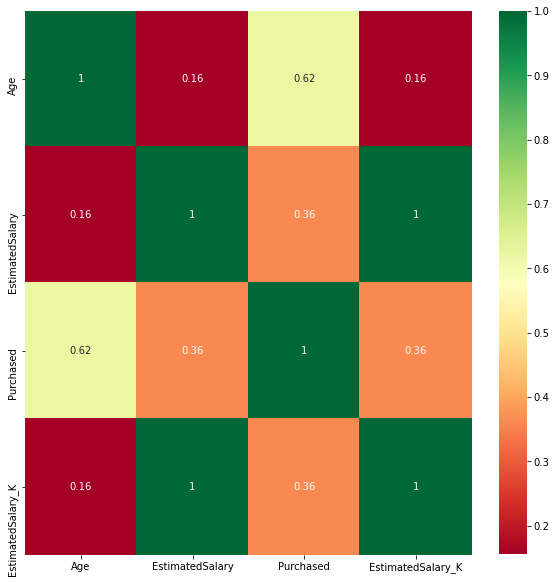

In [26]:
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(), cmap="RdYlGn", annot=True)
# annot=True: nếu muốn in cả giá trị

In [27]:
from sklearn.feature_selection import SelectKBest, chi2

In [28]:
#apply SelectKBest class to extract all best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(inputs,outputs)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(inputs.columns)

In [29]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(4,'Score')) #print 4 best features

             Specs          Score
1  EstimatedSalary  872013.169231
0              Age     451.155226
2        Purchased     257.000000


### => select features EstimatedSalary & Age => KNN

In [30]:
inputs_new = data.iloc[:,[2,3]]
inputs_new.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [31]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(inputs_new, outputs, test_size=0.30, random_state=1)

In [32]:
sc = StandardScaler()
X_train_n = sc.fit_transform(X_train_n)
X_test_n = sc.transform(X_test_n)

In [33]:
list_k = []
list_acc = []
for K_value in range(2,int((y_train.shape[0]**0.5)/2)):
    #for K_value in range(2,10):
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors = K_value)
    neigh.fit(X_train_n, y_train_n)
    y_pred = neigh.predict(X_test_n)
    acc = accuracy_score(y_test_n,y_pred)*100
    list_acc.append(acc)
    print("k = ", K_value,": Accuracy is ", accuracy_score(y_test_n,y_pred))

k =  2 : Accuracy is  0.8416666666666667
k =  3 : Accuracy is  0.875
k =  4 : Accuracy is  0.8833333333333333
k =  5 : Accuracy is  0.875
k =  6 : Accuracy is  0.875
k =  7 : Accuracy is  0.8666666666666667


### Với k=4 có độ chính xác cao hơn khoảng 1%